In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import matplotlib.ticker as mtick
import seaborn as sns

import notebook_util

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve, CalibrationDisplay
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import pickle

sns.set()

import notebook_util as n_util
from notebook_util import *

In [2]:
# Import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="UGYDiy3HENiE7Y3dqoMAVIgG2",
    project_name="custom-models",
    workspace="ift6758a-a22-g3-projet",
)

# Report multiple hyperparameters using a dictionary:
hyper_params = {
    "n_neighbors":2,
}
experiment.log_parameters(hyper_params)


COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/ift6758a-a22-g3-projet/custom-models/e73651300496481f94cd8acdd6a41ec9



In [3]:
df_filtered = prep_data()

df_filtered = prep_dummie(df_filtered)

c:\Users\Bei Ning\Documents\GitHub\nhlanalysis-a22-g3-projet\notebooks\notebook_util.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['emptyNet'] = df_filtered['emptyNet'].fillna(0)
c:\Users\Bei Ning\Documents\GitHub\nhlanalysis-a22-g3-projet\notebooks\notebook_util.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['strength'] = df_filtered['strength'].fillna('Even')


In [4]:
train, test = train_test_split(df_filtered, test_size=0.10, random_state=42)
print(train.shape)
print(test.shape)

(277810, 36)
(30868, 36)


In [5]:
x_train = train[notebook_util.feature]#.to_numpy().reshape(-1, columns_count)

y_train = train['isGoal']#.to_numpy()

x_test = test[notebook_util.feature]#.to_numpy().reshape(-1, columns_count)

y_test = test['isGoal']#.to_numpy()

In [6]:
x_train_t = x_train.to_numpy(dtype=np.float32)
y_train_t = y_train.values

x_test_t = x_test.to_numpy(dtype=np.float32)
y_test_t = y_test.values

In [7]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(x_train_t, y_train_t)

KNeighborsClassifier(n_neighbors=2)

In [8]:
y_test_pred = neigh.predict(x_test_t)

In [9]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_test_pred)
print(accuracy)

0.9040106258908902


0.5060268425619915


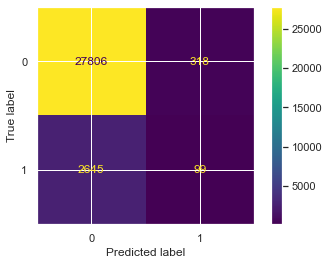

In [10]:
f1 = f1_score(y_test, y_test_pred, average='macro')
print(f1)
ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred)).plot()
plt.show()

In [11]:
pickle.dump(neigh, open("../models/knn.sav", 'wb'))
experiment.log_model("knn", "../models/knn.sav")
experiment.log_metric("f1", f1)
experiment.log_metric("accuracy", accuracy)
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/ift6758a-a22-g3-projet/custom-models/e73651300496481f94cd8acdd6a41ec9
COMET INFO:   Metrics:
COMET INFO:     accuracy : 0.9040106258908902
COMET INFO:     f1       : 0.5060268425619915
COMET INFO:   Parameters:
COMET INFO:     n_neighbors : 2
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     git metadata                 : 1
COMET INFO:     git-patch (uncompressed)     : 1 (1.86 KB)
COMET INFO:     installed packages           : 1
COMET INFO:     model-element                : 1 (38.15 MB)
COMET INFO:     notebook    